# 07. Population

## 1. 배경
- 목표
    - 1. 인구 소멸 위기 지역 파악
    - 2. 인구 소멸 위기 지역의 지도 표현
    - 3. 지도 표현에 대한 카르토그램 표현

## 2. 데이터를 읽고 인구 소멸 지역 계산하기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import warnings # 경고문구 무시해달라
warnings.filterwarnings(action='ignore')
%matplotlib inline


Hangul OK in your Windows!!!


In [3]:
# !pip install openpyxl

In [4]:
population = pd.read_excel('../data/07_population_raw_data.xlsx')
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12
0,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,전국,소계,총인구수 (명),51696216,3541061,3217367,3517868,4016272,2237345,1781229,1457890,909130,416164,141488,34844,17562
2,NaN,NaN,남자인구수 (명),25827594,1877127,1682988,1806754,2045265,1072395,806680,600607,319391,113221,32695,7658,4137
3,NaN,NaN,여자인구수 (명),25868622,1663934,1534379,1711114,1971007,1164950,974549,857283,589739,302943,108793,27186,13425
4,서울특별시,소계,총인구수 (명),9930616,690728,751973,803507,817467,448956,350580,251961,141649,66067,24153,7058,5475


In [5]:
population = pd.read_excel('../data/07_population_raw_data.xlsx', header=1)
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


---

## fillna()

In [6]:
datas = {
    'A' : np.random.randint(1, 45, 8), #1부터 45까지 중에 8개 랜덤으로.
    'B' : np.random.randint(1, 45, 8),
    'C' : np.random.randint(1, 45, 8)
}
datas

{'A': array([24,  9, 18, 29, 20, 10, 13, 41]),
 'B': array([25, 11, 32, 31, 31,  3, 19, 22]),
 'C': array([31, 18, 29, 25, 16, 20,  8, 13])}

In [7]:
fillna_df = pd.DataFrame(datas)
fillna_df

,A,B,C
0,24,25,31
1,9,11,18
2,18,32,29
3,29,31,25
4,20,31,16
5,10,3,20
6,13,19,8
7,41,22,13


In [8]:
fillna_df.loc[2:4, ['A']]

,A
2,18
3,29
4,20


In [9]:
fillna_df.loc[2:4, ['A']] = np.nan
fillna_df.loc[3:5, ['B']] = np.nan
fillna_df.loc[4:7, ['C']] = np.nan
fillna_df

,A,B,C
0,24.0,25.0,31.0
1,9.0,11.0,18.0
2,NaN,32.0,29.0
3,NaN,NaN,25.0
4,NaN,NaN,NaN
5,10.0,NaN,NaN
6,13.0,19.0,NaN
7,41.0,22.0,NaN


In [10]:
fillna_df.fillna(value=0) #기본옵션. nan값을 1로 채워라

,A,B,C
0,24.0,25.0,31.0
1,9.0,11.0,18.0
2,0.0,32.0,29.0
3,0.0,0.0,25.0
4,0.0,0.0,0.0
5,10.0,0.0,0.0
6,13.0,19.0,0.0
7,41.0,22.0,0.0


In [11]:
fillna_df.fillna(method='pad') # #pad/ffill = Nan값을 이전 값으로 채워줘라

,A,B,C
0,24.0,25.0,31.0
1,9.0,11.0,18.0
2,9.0,32.0,29.0
3,9.0,32.0,25.0
4,9.0,32.0,25.0
5,10.0,32.0,25.0
6,13.0,19.0,25.0
7,41.0,22.0,25.0


In [12]:
fillna_df.fillna(method='bfill') # #backfill/bfill = Nan값을 뒤의 값으로 채워줘라
#그런데 c값은 마지막 값이 없으므로 nan

,A,B,C
0,24.0,25.0,31.0
1,9.0,11.0,18.0
2,10.0,32.0,29.0
3,10.0,19.0,25.0
4,10.0,19.0,NaN
5,10.0,19.0,NaN
6,13.0,19.0,NaN
7,41.0,22.0,NaN


In [13]:
fillna_df.fillna(method='ffill', axis=1) #가로축 설정

,A,B,C
0,24.0,25.0,31.0
1,9.0,11.0,18.0
2,NaN,32.0,29.0
3,NaN,NaN,25.0
4,NaN,NaN,NaN
5,10.0,10.0,10.0
6,13.0,19.0,19.0
7,41.0,22.0,22.0


---

In [14]:
population.fillna(method='pad', inplace=True) 
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [15]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   행정구역(동읍면)별(1)  846 non-null    object 
 1   행정구역(동읍면)별(2)  846 non-null    object 
 2   항목             846 non-null    object 
 3   계              846 non-null    float64
 4   20 - 24세       846 non-null    float64
 5   25 - 29세       846 non-null    float64
 6   30 - 34세       846 non-null    int64  
 7   35 - 39세       846 non-null    float64
 8   65 - 69세       846 non-null    float64
 9   70 - 74세       846 non-null    float64
 10  75 - 79세       846 non-null    int64  
 11  80 - 84세       846 non-null    float64
 12  85 - 89세       846 non-null    float64
 13  90 - 94세       846 non-null    float64
 14  95 - 99세       846 non-null    int64  
 15  100+           846 non-null    float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.9+ KB


In [16]:
# 컬럼 이름 변경

population.rename(
    columns={
        '행정구역(동읍면)별(1)':'광역시도',
        '행정구역(동읍면)별(2)':'시군구',
        '계':'인구수'}, inplace=True)
population.tail()        

,광역시도,시군구,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
841,제주특별자치도,제주시,남자인구수 (명),235977.0,17377.0,13118.0,15084,18350.0,8474.0,6782.0,4941,2737.0,854.0,226.0,53,17.0
842,제주특별자치도,제주시,여자인구수 (명),234688.0,15261.0,12245.0,14687,18062.0,9265.0,7877.0,7178,5649.0,3122.0,1387.0,460,137.0
843,제주특별자치도,서귀포시,총인구수 (명),170932.0,10505.0,8067.0,9120,11606.0,8686.0,7460.0,6456,4521.0,1855.0,733.0,242,77.0
844,제주특별자치도,서귀포시,남자인구수 (명),86568.0,5600.0,4247.0,4693,6082.0,4237.0,3441.0,2611,1494.0,370.0,103.0,29,9.0
845,제주특별자치도,서귀포시,여자인구수 (명),84364.0,4905.0,3820.0,4427,5524.0,4449.0,4019.0,3845,3027.0,1485.0,630.0,213,68.0


In [17]:
population.head()

,광역시도,시군구,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [18]:
# 소계 제거
population = population[population['시군구'] != '소계']
population.head()

,광역시도,시군구,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [19]:
population.is_copy = False
# copy를 했을때 warning이 나오는데 warning을 내보내지 말아라. 굳이안해도됨

population.rename(columns={
    '항목' : '구분'
}, inplace=True)

In [20]:
population.loc[population['구분'] == '총인구수 (명)'] #행값을 앞에 열값을 뒤에
# 구분에서 총인구수 (명)인 행만 선택해줘.

,광역시도,시군구,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
12,서울특별시,용산구,총인구수 (명),230241.0,14317.0,16972.0,19032,19127.0,10675.0,9093.0,7477,4553.0,2254.0,916.0,264,315.0
15,서울특별시,성동구,총인구수 (명),299259.0,20813.0,23383.0,25507,25979.0,12938.0,10734.0,7989,4450.0,1944.0,678.0,209,198.0
18,서울특별시,광진구,총인구수 (명),357215.0,27368.0,32092.0,32302,29496.0,14402.0,11300.0,8121,4349.0,2029.0,689.0,228,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828,경상남도,함양군,총인구수 (명),40241.0,1943.0,1332.0,1453,1792.0,2869.0,2712.0,3124,2063.0,1050.0,360.0,64,32.0
831,경상남도,거창군,총인구수 (명),63308.0,3701.0,2478.0,2677,3277.0,3792.0,3493.0,3815,2682.0,1269.0,416.0,98,26.0
834,경상남도,합천군,총인구수 (명),48026.0,2057.0,1540.0,1638,1943.0,3891.0,3717.0,4349,3142.0,1346.0,409.0,90,28.0
840,제주특별자치도,제주시,총인구수 (명),470665.0,32638.0,25363.0,29771,36412.0,17739.0,14659.0,12119,8386.0,3976.0,1613.0,513,154.0


In [21]:
population.loc[population['구분'] == '총인구수 (명)', '구분'] #행값을 앞에 열값을 뒤에
# 구분에서 총인구수 (명)인 행이면서 열값이 '구분'인 데이터를 선택해줘.

6      총인구수 (명)
9      총인구수 (명)
12     총인구수 (명)
15     총인구수 (명)
18     총인구수 (명)
         ...   
828    총인구수 (명)
831    총인구수 (명)
834    총인구수 (명)
840    총인구수 (명)
843    총인구수 (명)
Name: 구분, Length: 264, dtype: object

In [22]:
population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계' #행값을 앞에 열값을 뒤에
# 구분에서 총인구수 (명)인 행이면서 열값이 '구분'인 데이터를 합계로 바꿔줘.
population.head()

,광역시도,시군구,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [23]:
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

population.head()

,광역시도,시군구,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [24]:
# 소멸지역을 조사하기 위한 데이터

population['20-39세'] = (
    population['25 - 29세'] + population['30 - 34세'] +
    population['35 - 39세']
)

population['65세 이상'] = (
    population['65 - 69세'] + population['70 - 74세'] +
    population['75 - 79세'] + population['80 - 84세'] +
    population['85 - 89세'] + population['90 - 94세'] + 
    population['95 - 99세'] + population['100+']
)

In [25]:
population.head()

,광역시도,시군구,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세 이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,32954.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,16602.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,16352.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,29968.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,15205.0,8852.0


In [26]:
pop = pd.pivot_table(
    data=population,
    index=['광역시도', '시군구']) 
    #만약 columns와 values를 지정해주지 않으면 평균값으로 자동계산해서 나옴

pop.head()

100+     20 - 24세        20-39세     25 - 29세     30 - 34세  \
광역시도 시군구                                                                   
강원도  강릉시  51.333333  9690.666667  23232.000000  6845.333333  7176.666667   
     고성군   6.666667  1734.666667   2947.333333  1244.666667   845.333333   
     동해시  18.000000  3784.666667  10391.333333  2688.666667  3309.333333   
     삼척시  26.000000  3812.000000   6736.666667  1985.333333  2085.333333   
     속초시  17.333333  3360.000000   9112.000000  2614.666667  2911.333333   

             35 - 39세     65 - 69세        65세 이상     70 - 74세     75 - 79세  \
광역시도 시군구                                                                     
강원도  강릉시  9210.000000  7104.666667  25119.333333  6694.000000  5542.666667   
     고성군   857.333333  1174.000000   4767.333333  1308.000000  1142.666667   
     동해시  4393.333333  2996.666667  10082.666667  2740.666667  2192.000000   
     삼척시  2666.000000  2632.666667   9740.000000  2480.000000  2200.000000   
     속초시  3586.000000  2408.000000   8501.333333  2300.000000  1820.666667   

             80 - 84세     85 - 89세    90 - 94세    95 - 99세            인구수  
광역시도 시군구                                                                   
강원도  강릉시  3284.000000  1639.333333  650.000000  153.333333  142564.000000  
     고성군   606.666667   344.666667  146.666667   38.000000   20076.000000  
     동해시  1287.333333   602.666667  201.333333   44.000000   62198.000000  
     삼척시  1442.000000   678.666667  240.666667   40.000000   46399.333333  
     속초시  1091.333333   601.333333  224.000000   38.666667   54528.666667

In [27]:
pop = pd.pivot_table(
    data=population,
    index=['광역시도', '시군구'],
    columns=['구분'],
    values=['인구수', '20-39세', '65세 이상']) 

pop.head()

20-39세                     65세 이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시군구                                                                   
강원도  강릉시  18282.0  16566.0  34848.0  15767.0  21912.0  37679.0  106231.0   
     고성군   2713.0   1708.0   4421.0   2900.0   4251.0   7151.0   15899.0   
     동해시   8231.0   7356.0  15587.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   5635.0   4470.0  10105.0   5892.0   8718.0  14610.0   35253.0   
     속초시   7156.0   6512.0  13668.0   5139.0   7613.0  12752.0   40288.0   

                              
구분              여자        합계  
광역시도 시군구                      
강원도  강릉시  107615.0  213846.0  
     고성군   14215.0   30114.0  
     동해시   46131.0   93297.0  
     삼척시   34346.0   69599.0  
     속초시   41505.0   81793.0

In [28]:
# 소멸비율 계산
# 인구소멸위기지역: 65세 이상 노인인구와 20-39세 여성인구 비교해 
# 젊은 여성인구가 노인인구의 절반에 미달할 경우 '소멸위험지역'으로 분류

pop['소멸비율'] = pop['20-39세', '여자'] / (pop['65세 이상', '합계'] / 2)
pop.tail()

20-39세                      65세 이상                         인구수  \
구분             남자       여자        합계       남자       여자       합계        남자   
광역시도 시군구                                                                    
충청북도 진천군   7168.0   5851.0   13019.0   4731.0   6575.0  11306.0   36387.0   
     청원구  25543.0  22116.0   47659.0   8417.0  11914.0  20331.0   97006.0   
     청주시  94879.0  87248.0  182127.0  37882.0  53671.0  91553.0  419323.0   
     충주시  19013.0  16713.0   35726.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구  30512.0  28394.0   58906.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시군구                                
충청북도 진천군   33563.0   69950.0  1.035026  
     청원구   93807.0  190813.0  2.175594  
     청주시  415874.0  835197.0  1.905956  
     충주시  103473.0  208350.0  0.960793  
     흥덕구  125916.0  253563.0  2.420734

In [29]:
# 소멸위기지역 컬럼 생성

pop['소멸위기지역'] = pop['소멸비율'] < 1
pop

20-39세                      65세 이상                         인구수  \
구분             남자       여자        합계       남자       여자       합계        남자   
광역시도 시군구                                                                    
강원도  강릉시  18282.0  16566.0   34848.0  15767.0  21912.0  37679.0  106231.0   
     고성군   2713.0   1708.0    4421.0   2900.0   4251.0   7151.0   15899.0   
     동해시   8231.0   7356.0   15587.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   5635.0   4470.0   10105.0   5892.0   8718.0  14610.0   35253.0   
     속초시   7156.0   6512.0   13668.0   5139.0   7613.0  12752.0   40288.0   
...           ...      ...       ...      ...      ...      ...       ...   
충청북도 진천군   7168.0   5851.0   13019.0   4731.0   6575.0  11306.0   36387.0   
     청원구  25543.0  22116.0   47659.0   8417.0  11914.0  20331.0   97006.0   
     청주시  94879.0  87248.0  182127.0  37882.0  53671.0  91553.0  419323.0   
     충주시  19013.0  16713.0   35726.0  14407.0  20383.0  34790.0  104877.0   
     흥덕구  30512.0  28394.0   58906.0   9788.0  13671.0  23459.0  127647.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시군구                                       
강원도  강릉시  107615.0  213846.0  0.879323   True  
     고성군   14215.0   30114.0  0.477695   True  
     동해시   46131.0   93297.0  0.972759   True  
     삼척시   34346.0   69599.0  0.611910   True  
     속초시   41505.0   81793.0  1.021330  False  
...            ...       ...       ...    ...  
충청북도 진천군   33563.0   69950.0  1.035026  False  
     청원구   93807.0  190813.0  2.175594  False  
     청주시  415874.0  835197.0  1.905956  False  
     충주시  103473.0  208350.0  0.960793   True  
     흥덕구  125916.0  253563.0  2.420734  False  

[264 rows x 11 columns]

In [30]:
# 소멸위기지역 조회
pop[pop['소멸위기지역'] == True] #불리한 값으로 나와서 마스킹

20-39세                     65세 이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시군구                                                                   
강원도  강릉시  18282.0  16566.0  34848.0  15767.0  21912.0  37679.0  106231.0   
     고성군   2713.0   1708.0   4421.0   2900.0   4251.0   7151.0   15899.0   
     동해시   8231.0   7356.0  15587.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   5635.0   4470.0  10105.0   5892.0   8718.0  14610.0   35253.0   
     양구군   2795.0   1899.0   4694.0   1650.0   2458.0   4108.0   12918.0   
...           ...      ...      ...      ...      ...      ...       ...   
충청북도 영동군   3512.0   2860.0   6372.0   5564.0   8186.0  13750.0   25248.0   
     옥천군   3794.0   3191.0   6985.0   5533.0   7722.0  13255.0   26251.0   
     음성군   9637.0   7805.0  17442.0   7301.0   9605.0  16906.0   51372.0   
     제천시  11305.0  10089.0  21394.0  10227.0  13904.0  24131.0   68444.0   
     충주시  19013.0  16713.0  35726.0  14407.0  20383.0  34790.0  104877.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시군구                                       
강원도  강릉시  107615.0  213846.0  0.879323   True  
     고성군   14215.0   30114.0  0.477695   True  
     동해시   46131.0   93297.0  0.972759   True  
     삼척시   34346.0   69599.0  0.611910   True  
     양구군   11092.0   24010.0  0.924537   True  
...            ...       ...       ...    ...  
충청북도 영동군   25304.0   50552.0  0.416000   True  
     옥천군   26016.0   52267.0  0.481479   True  
     음성군   46415.0   97787.0  0.923341   True  
     제천시   68073.0  136517.0  0.836186   True  
     충주시  103473.0  208350.0  0.960793   True  

[107 rows x 11 columns]

In [31]:
pop[pop['소멸위기지역'] == True].index.get_level_values(1) #0번이 광역시~.고 1번이 시군구~.

Index(['강릉시', '고성군', '동해시', '삼척시', '양구군', '양양군', '영월군', '인제군', '정선군', '철원군',
       ...
       '태안군', '홍성군', '괴산군', '단양군', '보은군', '영동군', '옥천군', '음성군', '제천시', '충주시'],
      dtype='object', name='시군구', length=107)

In [32]:
# 광역시도와 시군구를 인덱스에서 컬럼으로 잡히도록 데이터프레임 안으로 집어넣어주기
pop.reset_index(inplace=True)
pop.head()
# 그런데 현재 광역시도와 시군구가 아래 빈컬럼과 합쳐져서 멀티컬럼이 되었음. 빈컬럼과 합쳐 하나의 컬럼으로 만들것

광역시도  시군구   20-39세                     65세 이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  18282.0  16566.0  34848.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   2713.0   1708.0   4421.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시   8231.0   7356.0  15587.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   5635.0   4470.0  10105.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   7156.0   6512.0  13668.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  0.879323   True  
1    14215.0   30114.0  0.477695   True  
2    46131.0   93297.0  0.972759   True  
3    34346.0   69599.0  0.611910   True  
4    41505.0   81793.0  1.021330  False

In [33]:
pop.columns.get_level_values(0)

Index(['광역시도', '시군구', '20-39세', '20-39세', '20-39세', '65세 이상', '65세 이상',
       '65세 이상', '인구수', '인구수', '인구수', '소멸비율', '소멸위기지역'],
      dtype='object')

In [34]:
pop.columns.get_level_values(1)

Index(['', '', '남자', '여자', '합계', '남자', '여자', '합계', '남자', '여자', '합계', '', ''], dtype='object', name='구분')

In [35]:
tmp_columns = [
    pop.columns.get_level_values(0)[n] + pop.columns.get_level_values(1)[n]
    for n in range(0, len(pop.columns.get_level_values(0)))
]

tmp_columns

['광역시도',
 '시군구',
 '20-39세남자',
 '20-39세여자',
 '20-39세합계',
 '65세 이상남자',
 '65세 이상여자',
 '65세 이상합계',
 '인구수남자',
 '인구수여자',
 '인구수합계',
 '소멸비율',
 '소멸위기지역']

In [36]:
pop.columns = tmp_columns
pop.head()

,광역시도,시군구,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,18282.0,16566.0,34848.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,0.879323,True
1,강원도,고성군,2713.0,1708.0,4421.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.477695,True
2,강원도,동해시,8231.0,7356.0,15587.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,0.972759,True
3,강원도,삼척시,5635.0,4470.0,10105.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.611910,True
4,강원도,속초시,7156.0,6512.0,13668.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.021330,False


## 3. 지도 시각화를 위한 지역별 ID 만들기

- 만들어야 할 ID 예시는 아래와 같다.
    - 서울 중구
    - 서울 서초
    - 통영
    - 남양주
    - 포항 북구
    - 인천 남동
    - 안양 만안
    - 안양 동안
    - 안산 단원


In [37]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   광역시도      264 non-null    object 
 1   시군구       264 non-null    object 
 2   20-39세남자  264 non-null    float64
 3   20-39세여자  264 non-null    float64
 4   20-39세합계  264 non-null    float64
 5   65세 이상남자  264 non-null    float64
 6   65세 이상여자  264 non-null    float64
 7   65세 이상합계  264 non-null    float64
 8   인구수남자     264 non-null    float64
 9   인구수여자     264 non-null    float64
 10  인구수합계     264 non-null    float64
 11  소멸비율      264 non-null    float64
 12  소멸위기지역    264 non-null    bool   
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


In [38]:
pop['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [39]:
pop['시군구'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [40]:
si_name = [None] * len(pop) #264개. for문에서 si_name[idx] 해야되서 필요. 
si_name

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [41]:
# 자치구는 자료에 나와있으나 행정구를 가진 지역은 자료에 나와있지 않아 따로 신경써줘야함
# 예를 들어 수정구는 경기 수정이라고 됌. 성남 수정까지 나오게 하는게 목표
# pop['시군구'] 에는 들어가있음
tmp_gu_dict = {
    '수원': ['장안구', '권선구', '팔달구', '영통구'],
    '성남': ['수정구', '중원구', '분당구'],
    '안양': ['만안구', '동안구'],
    '안산': ['상록구', '단원구'],
    '고양': ['덕양구', '일산동구', '일산서구'],
    '용인': ['처인구', '기흥구', '수지구'],
    '청주': ['상당구', '서원구', '흥덕구', '청원구'],
    '천안': ['동남구', '서북구'],
    '전주': ['완산구', '덕진구'],
    '포항': ['남구', '북구'],
    '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
    '부천': ['오정구', '원미구', '소사구']
}

In [42]:
pop['시군구'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

#### (1) 일반 시 이름과 세종시, 광역시도 일반 구 정리

In [43]:
text = '서울특별시'
text[-3:] #마지막글자에서 세글자만 선택해라 

'특별시'

In [44]:
text = '임실군'
text[:-1] # 마지막 한글자만 빼라

'임실'

In [45]:
text1 = '서울특별시'
text2 = '중구'

text = text1[:2] + ' ' + text2
text

'서울 중구'

In [46]:
text1 = '대전광역시'
text2 = '유성구'

text = text1[:2] + ' ' + text2[:-1]
text

'대전 유성'

In [47]:
pop['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [48]:
for idx, row in pop.iterrows():
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263


In [49]:
for idx, row in pop.iterrows():
    print(row)

광역시도             강원도
시군구              강릉시
20-39세남자     18282.0
20-39세여자     16566.0
20-39세합계     34848.0
65세 이상남자     15767.0
65세 이상여자     21912.0
65세 이상합계     37679.0
인구수남자       106231.0
인구수여자       107615.0
인구수합계       213846.0
소멸비율        0.879323
소멸위기지역          True
Name: 0, dtype: object
광역시도             강원도
시군구              고성군
20-39세남자      2713.0
20-39세여자      1708.0
20-39세합계      4421.0
65세 이상남자      2900.0
65세 이상여자      4251.0
65세 이상합계      7151.0
인구수남자        15899.0
인구수여자        14215.0
인구수합계        30114.0
소멸비율        0.477695
소멸위기지역          True
Name: 1, dtype: object
광역시도             강원도
시군구              동해시
20-39세남자      8231.0
20-39세여자      7356.0
20-39세합계     15587.0
65세 이상남자      6392.0
65세 이상여자      8732.0
65세 이상합계     15124.0
인구수남자        47166.0
인구수여자        46131.0
인구수합계        93297.0
소멸비율        0.972759
소멸위기지역          True
Name: 2, dtype: object
광역시도            강원도
시군구             삼척시
20-39세남자     5635.0
20-39세여자     4470.0
20-39세합계    10105.0
65세 이상남자    

In [50]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        si_name[idx] = row['시군구'][:-1]
    
    elif row['광역시도'] == '세종특별자치시':
        si_name[idx] = '세종'

    else:
        if len(row['시군구']) == 2:
            si_name[idx] = row['광역시도'][:2] + ' ' + row['시군구']
        else:
            si_name[idx] = row['광역시도'][:2] + ' ' + row['시군구'][:-1]   

In [51]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '권선',
 '기흥',
 '김포',
 '남양주',
 '단원',
 '덕양',
 '동두천',
 '동안',
 '만안',
 '부천',
 '분당',
 '상록',
 '성남',
 '소사',
 '수원',
 '수정',
 '수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '영통',
 '오산',
 '오정',
 '용인',
 '원미',
 '의왕',
 '의정부',
 '이천',
 '일산동',
 '일산서',
 '장안',
 '중원',
 '처인',
 '파주',
 '팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '마산합포',
 '마산회원',
 '밀양',
 '사천',
 '산청',
 '성산',
 '양산',
 '의령',
 '의창',
 '진주',
 '진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '남',
 '문경',
 '봉화',
 '북',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유성',
 '대전

#### (2) 행정구 정리

In [52]:
#딕셔너리 형태
tmp_gu_dict

{'수원': ['장안구', '권선구', '팔달구', '영통구'],
 '성남': ['수정구', '중원구', '분당구'],
 '안양': ['만안구', '동안구'],
 '안산': ['상록구', '단원구'],
 '고양': ['덕양구', '일산동구', '일산서구'],
 '용인': ['처인구', '기흥구', '수지구'],
 '청주': ['상당구', '서원구', '흥덕구', '청원구'],
 '천안': ['동남구', '서북구'],
 '전주': ['완산구', '덕진구'],
 '포항': ['남구', '북구'],
 '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
 '부천': ['오정구', '원미구', '소사구']}

In [53]:
for idx, row in pop.iterrows(): #데이터프레임에서 keys와 values로 나눠갖는 건 iterrows()함수
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        for keys, values in tmp_gu_dict.items(): #딕셔너리에서 keys와 values로 나눠갖는 건 items()함수
            print(keys)

수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포항
창원
부천
수원
성남
안양
안산
고양
용인
청주
천안
전주
포

In [54]:
for idx, row in pop.iterrows(): #데이터프레임에서 keys와 values로 나눠갖는 건 iterrows()함수
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        for keys, values in tmp_gu_dict.items(): #딕셔너리에서 keys와 values로 나눠갖는 건 items()함수
            print(values)

['장안구', '권선구', '팔달구', '영통구']
['수정구', '중원구', '분당구']
['만안구', '동안구']
['상록구', '단원구']
['덕양구', '일산동구', '일산서구']
['처인구', '기흥구', '수지구']
['상당구', '서원구', '흥덕구', '청원구']
['동남구', '서북구']
['완산구', '덕진구']
['남구', '북구']
['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
['오정구', '원미구', '소사구']
['장안구', '권선구', '팔달구', '영통구']
['수정구', '중원구', '분당구']
['만안구', '동안구']
['상록구', '단원구']
['덕양구', '일산동구', '일산서구']
['처인구', '기흥구', '수지구']
['상당구', '서원구', '흥덕구', '청원구']
['동남구', '서북구']
['완산구', '덕진구']
['남구', '북구']
['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
['오정구', '원미구', '소사구']
['장안구', '권선구', '팔달구', '영통구']
['수정구', '중원구', '분당구']
['만안구', '동안구']
['상록구', '단원구']
['덕양구', '일산동구', '일산서구']
['처인구', '기흥구', '수지구']
['상당구', '서원구', '흥덕구', '청원구']
['동남구', '서북구']
['완산구', '덕진구']
['남구', '북구']
['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
['오정구', '원미구', '소사구']
['장안구', '권선구', '팔달구', '영통구']
['수정구', '중원구', '분당구']
['만안구', '동안구']
['상록구', '단원구']
['덕양구', '일산동구', '일산서구']
['처인구', '기흥구', '수지구']
['상당구', '서원구', '흥덕구', '청원구']
['동남구', '서북구']
['완산구', '덕진구']
['남구', '북구']
['의창구', '성산구', '진해

In [55]:
text = '마산회원구'
text[2:-1], text[2:4]

('회원', '회원')

In [56]:
for idx, row in pop.iterrows(): #데이터프레임에서 keys와 values로 나눠갖는 건 iterrows()함수
    if row['광역시도'][-3:] not in ['광역시', '특별시', '자치시']:
        for keys, values in tmp_gu_dict.items(): #딕셔너리에서 keys와 values로 나눠갖는 건 items()함수
            if row['시군구'] in values: 
                if len(row['시군구']) == 2: #남구, 북구
                    si_name[idx] = keys + ' ' + row['시군구']

                elif row['시군구'] in ['마산합포구', '마산회원구']:
                    si_name[idx] = keys + ' ' + row['시군구'][2:-1]

                else:
                    si_name[idx] = keys + ' ' + row['시군구'][:-1] #완산구, 일산서구, 덕진구 등   


In [57]:
si_name

['강릉',
 '고성',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 

### (3) 고성군 -> 강원도, 경상남도 두군데 있음

In [58]:
for idx, row in pop.iterrows():
    if row['광역시도'][-3:] != ['특별시', '광역시', '자치시']: # not in ['특별시', '광역시', '자치시'] 해도 되고 != ['특별시', '광역시', '자치시'] 해도됨
        if row['시군구'][:-1] in ['고성'] and row['광역시도'] == '강원도':
                si_name[idx] = '고성(강원)'
        elif row['시군구'][:-1] == '고성' and row['광역시도'] == '경상남도': # in ['고성] 해도 되고 == '고성' 해도됨
                si_name[idx] = '고성(경남)'   

In [59]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '수원 권선',
 '용인 기흥',
 '김포',
 '남양주',
 '안산 단원',
 '고양 덕양',
 '동두천',
 '안양 동안',
 '안양 만안',
 '부천',
 '성남 분당',
 '안산 상록',
 '성남',
 '부천 소사',
 '수원',
 '성남 수정',
 '용인 수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '수원 영통',
 '오산',
 '부천 오정',
 '용인',
 '부천 원미',
 '의왕',
 '의정부',
 '이천',
 '고양 일산동',
 '고양 일산서',
 '수원 장안',
 '성남 중원',
 '용인 처인',
 '파주',
 '수원 팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '창원 합포',
 '창원 회원',
 '밀양',
 '사천',
 '산청',
 '창원 성산',
 '양산',
 '의령',
 '창원 의창',
 '진주',
 '창원 진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '포항 남구',
 '문경',
 '봉화',
 '포항 북구',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구

In [60]:
pop['ID'] = si_name
pop

,광역시도,시군구,20-39세남자,20-39세여자,20-39세합계,65세 이상남자,65세 이상여자,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,18282.0,16566.0,34848.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,0.879323,True,강릉
1,강원도,고성군,2713.0,1708.0,4421.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.477695,True,고성(강원)
2,강원도,동해시,8231.0,7356.0,15587.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,0.972759,True,동해
3,강원도,삼척시,5635.0,4470.0,10105.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.611910,True,삼척
4,강원도,속초시,7156.0,6512.0,13668.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.021330,False,속초
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,충청북도,진천군,7168.0,5851.0,13019.0,4731.0,6575.0,11306.0,36387.0,33563.0,69950.0,1.035026,False,진천
260,충청북도,청원구,25543.0,22116.0,47659.0,8417.0,11914.0,20331.0,97006.0,93807.0,190813.0,2.175594,False,청주 청원
261,충청북도,청주시,94879.0,87248.0,182127.0,37882.0,53671.0,91553.0,419323.0,415874.0,835197.0,1.905956,False,청주
262,충청북도,충주시,19013.0,16713.0,35726.0,14407.0,20383.0,34790.0,104877.0,103473.0,208350.0,0.960793,True,충주


In [61]:
del pop['20-39세남자']
del pop['65세 이상남자']
del pop['65세 이상여자']


In [62]:
pop.head()

,광역시도,시군구,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,16566.0,34848.0,37679.0,106231.0,107615.0,213846.0,0.879323,True,강릉
1,강원도,고성군,1708.0,4421.0,7151.0,15899.0,14215.0,30114.0,0.477695,True,고성(강원)
2,강원도,동해시,7356.0,15587.0,15124.0,47166.0,46131.0,93297.0,0.972759,True,동해
3,강원도,삼척시,4470.0,10105.0,14610.0,35253.0,34346.0,69599.0,0.611910,True,삼척
4,강원도,속초시,6512.0,13668.0,12752.0,40288.0,41505.0,81793.0,1.021330,False,속초


## 4. 지도 그리기(카르토그램)

In [63]:
draw_korea_raw = pd.read_excel('../data/07_draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [64]:
draw_korea_raw.stack() #stack(): pivot_table의 반대. 철원은 행번호 0 열번호 7에 위치.

0   7         철원
    8         화천
    9         양구
    10    고성(강원)
1   3         양주
           ...  
24  2         장흥
    3         보성
25  2         완도
    5         제주
26  5        서귀포
Length: 252, dtype: object

In [65]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked

0
0  7       철원
   8       화천
   9       양구
   10  고성(강원)
1  3       양주
...       ...
24 2       장흥
   3       보성
25 2       완도
   5       제주
26 5      서귀포

[252 rows x 1 columns]

In [66]:
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked

,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [67]:
draw_korea_raw_stacked.rename(columns={
    'level_0':'y',
    'level_1':'x',
    0:'ID'}, inplace=True)

draw_korea_raw_stacked   

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
247,24,2,장흥
248,24,3,보성
249,25,2,완도
250,25,5,제주


In [68]:
draw_korea = draw_korea_raw_stacked

In [69]:
BORDER_LINES = [
    [(5, 1), (5, 2), (7, 2), (7, 3), (11, 3), (11, 0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7), (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5), (15, 4), (16, 4), (16, 2)], # 충청북도
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21, 4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(13, 5), (13, 6), (16, 6)], 
    [(13, 5), (14, 5)], # 대전시 # 세종시
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8), (16, 6)], # 충청북도
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10), (16, 11), (14, 11)], # 대구
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산
    [(16, 11), (16, 13)],
    [(27, 5), (27, 6), (25, 6)]
]

In [70]:
draw_korea['ID'][13]

'고양 일산동'

In [71]:
draw_korea['ID'][13].split()

['고양', '일산동']

In [72]:
draw_korea['ID'][13].split()[1]

'일산동'

In [73]:
draw_korea['ID'][9]

'인제'

In [74]:
# 띄어쓰기가 없으므로 split() 해도 그대로.
draw_korea['ID'][9].split()

['인제']

In [75]:
i = '안녕하세요~ \n저는 김초코입니다 \n제 친구는 김푸르미입니다'
print(i)

안녕하세요~ 
저는 김초코입니다 
제 친구는 김푸르미입니다


In [76]:
i.splitlines()

['안녕하세요~ ', '저는 김초코입니다 ', '제 친구는 김푸르미입니다']

In [77]:
i.splitlines()[-1] #-1은 맨마지막

'제 친구는 김푸르미입니다'

In [78]:
i.splitlines()[-2] 

'저는 김초코입니다 '

In [79]:
i.splitlines()[-3] 

'안녕하세요~ '

In [80]:
#엑셀파일 참고할것. 2글자 이상은 너무 길어서 지도에 표시하기가 너무 김 그래서 엑셀파일처럼 보이도록 작업.
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1]) 
            #dispname이라는 변수는 지도에 나타내는 이름을 뜻함
            # \n: 개행해라.
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        if len(dispname.splitlines()[-1]) >= 3: #splitlines(): 줄 단위로 문자열 리스트 변환
            fontsize, linespacing = 9.5, 1.5 #linespacing: 띄어쓰기
            # 글자가 3글자이면 좀 작게 표현
        else:
            fontsize, linespacing = 11, 1.2
            # 글자가 3글자 미만이면 좀 크게 표현   

        plt.annotate(
            dispname,
            (row['x'] , row['y']),
            weight='bold',
            fontsize=fontsize, #위 if문에서 설정한 것
            linespacing=linespacing #위 if문에서 설정한 것
            )
        #plt.annotate: matplotlib에서 주석을 달기위한 기능. 지도 위에 지역이름을 나타내기 위해.

In [81]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8,11))

    plot_text_simple(draw_korea)

    for path in BORDER_LINES:
        ys, xs = zip(*path) #x좌표끼리 모아주고 y좌표끼리 모아주는 것임
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis() 
    #엑셀은 y가 큰것부터 위로 올라갈수록 작아짐. 그래프는 작은것에서 위로 올라가면 커짐. 그래서 이걸 추가함
   #plt.axis('off')
    #plt.tight_layout()
    plt.show()    

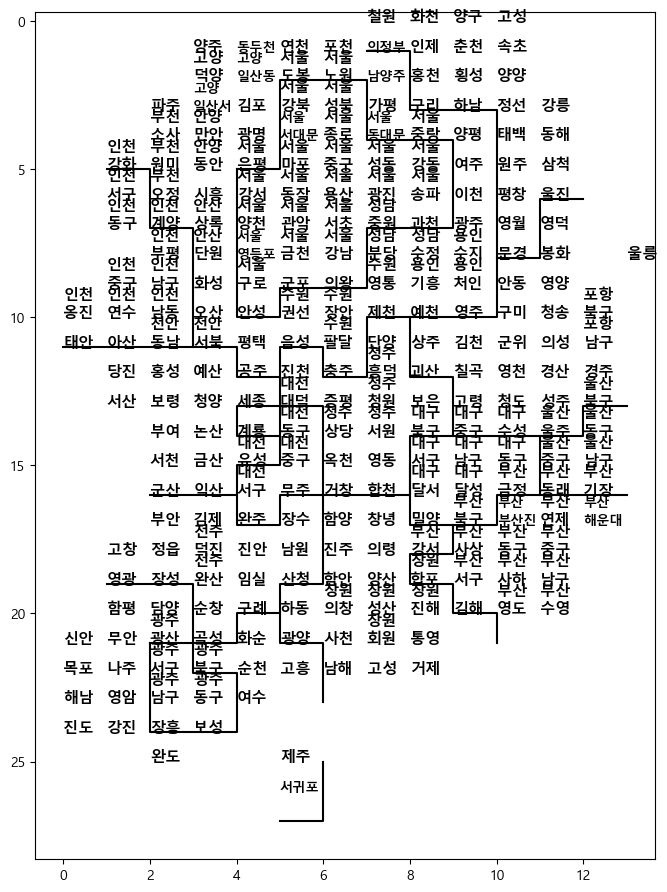

In [82]:
simpleDraw(draw_korea) 

- plt.axis('off'): 그래프의 모든 축과 라벨(이름) 제거. x축과 y축 이름.

- plt.tight_layout(): 파이썬 이미지 사이즈 잘림 방지

In [83]:
#엑셀파일 참고할것. 2글자 이상은 너무 길어서 지도에 표시하기가 너무 김 그래서 엑셀파일처럼 보이도록 작업.
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1]) 
            #dispname이라는 변수는 지도에 나타내는 이름을 뜻함
            # \n: 개행해라.
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        if len(dispname.splitlines()[-1]) >= 3:  #splitlines(): 줄 단위로 문자열 리스트 변환
            fontsize, linespacing = 9.5, 1.5 #linespacing: 띄어쓰기
            # 글자가 3글자이면 좀 작게 표현
        else:
            fontsize, linespacing = 11, 1.2
            # 글자가 3글자 미만이면 좀 크게 표현   

        plt.annotate(
            dispname,
            (row['x'], row['y']),
            weight='bold',
            fontsize=fontsize, #위 if문에서 설정한 것
            linespacing=linespacing, #위 if문에서 설정한 것
            )
        #plt.annotate: matplotlib에서 주석을 달기위한 기능. 지도 위에 지역이름을 나타내기 위해.

In [84]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8,11))

    plot_text_simple(draw_korea)

    for path in BORDER_LINES:
        ys, xs = zip(*path) #x좌표끼리 모아주고 y좌표끼리 모아주는 것임
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis() 
    # plt.gca().invert_yaxis(): y축을 뒤집어 주는것 반대로 x축을 뒤집어주는건 plt.gca().invert_xaxis()
    # 엑셀은 y가 큰것부터 위로 올라갈수록 작아짐. 그래프는 작은것에서 위로 올라가면 커짐. 
    # 그래서 이걸 추가함
    plt.axis('off') #그래프의 모든 축과 라벨(이름) 제거. x축과 y축 이름.
    plt.tight_layout() #파이썬 이미지 사이즈 잘림 방지
    plt.show()  

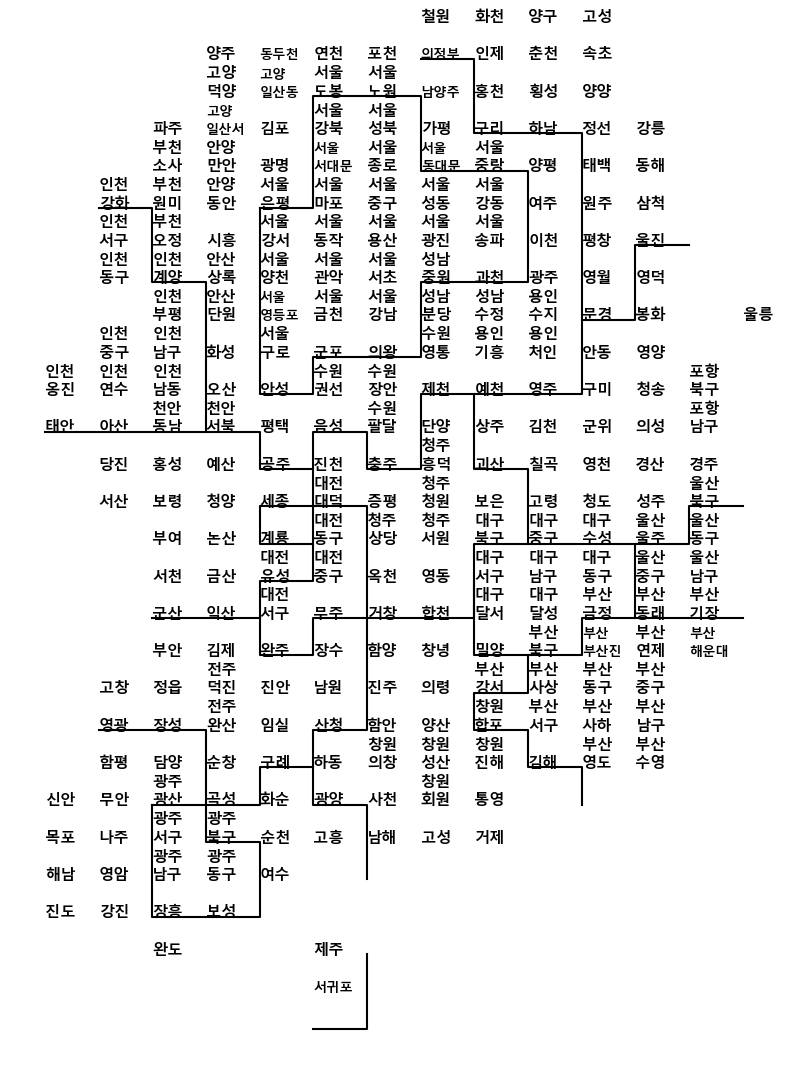

In [85]:
simpleDraw(draw_korea) 

- ha='center': 수평정렬
- va='center': 수직정렬

In [86]:
#엑셀파일 참고할것. 2글자 이상은 너무 길어서 지도에 표시하기가 너무 김 그래서 엑셀파일처럼 보이도록 작업.
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1]) 
            #dispname이라는 변수는 지도에 나타내는 이름을 뜻함
            # \n: 개행해라.
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        if len(dispname.splitlines()[-1]) >= 3:  #splitlines(): 줄 단위로 문자열 리스트 변환
            fontsize, linespacing = 9.5, 1.5 #linespacing: 띄어쓰기
            # 글자가 3글자이면 좀 작게 표현
        else:
            fontsize, linespacing = 11, 1.2
            # 글자가 3글자 미만이면 좀 크게 표현   

        plt.annotate(
            dispname,
            (row['x'], row['y']),
            weight='bold',
            fontsize=fontsize, #위 if문에서 설정한 것
            linespacing=linespacing, #위 if문에서 설정한 것
            ha='center', # 수평정렬
            va='center' # 수직정렬
            )
        #plt.annotate: matplotlib에서 주석을 달기위한 기능. 지도 위에 지역이름을 나타내기 위해.

In [87]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8,11))

    plot_text_simple(draw_korea)

    for path in BORDER_LINES:
        ys, xs = zip(*path) #x좌표끼리 모아주고 y좌표끼리 모아주는 것임
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis() 
    # plt.gca().invert_yaxis(): y축을 뒤집어 주는것 반대로 x축을 뒤집어주는건 plt.gca().invert_xaxis()
    # 엑셀은 y가 큰것부터 위로 올라갈수록 작아짐. 그래프는 작은것에서 위로 올라가면 커짐. 
    # 그래서 이걸 추가함
    plt.axis('off') #그래프의 모든 축과 라벨(이름) 제거. x축과 y축 이름.
    plt.tight_layout() #파이썬 이미지 사이즈 잘림 방지
    plt.show()  

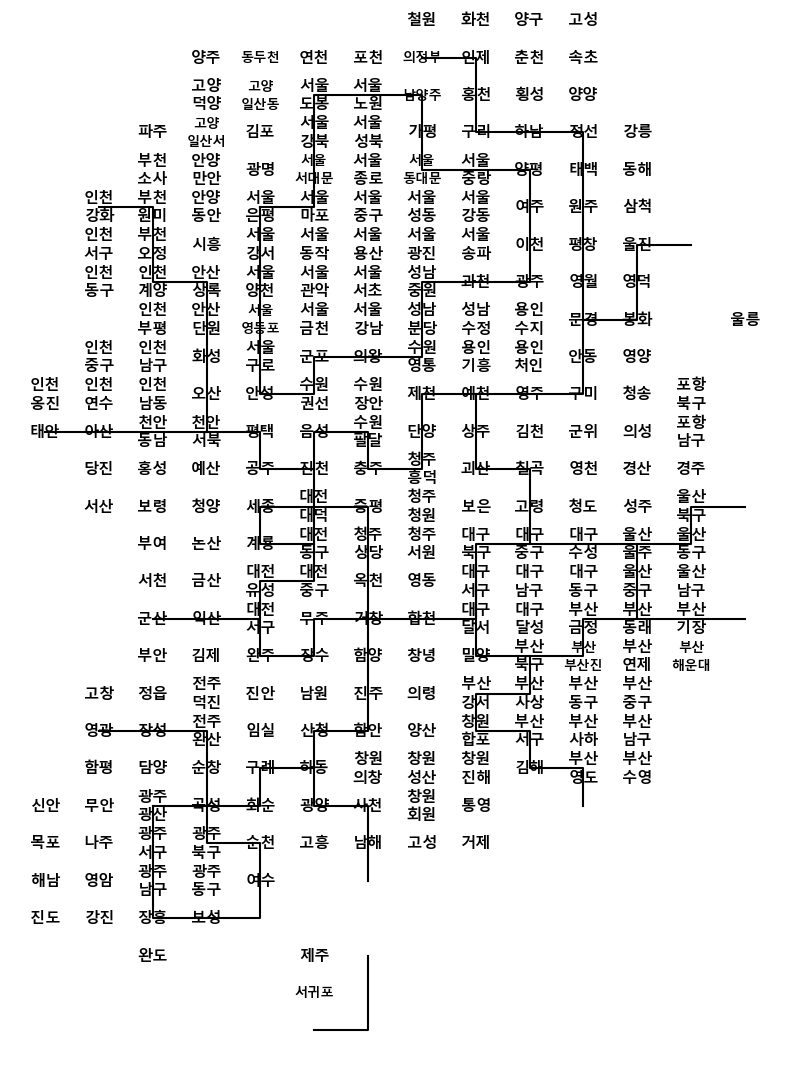

In [88]:
simpleDraw(draw_korea)

- row['x'] + 0.5
- row['y'] + 0.5

In [89]:
#엑셀파일 참고할것. 2글자 이상은 너무 길어서 지도에 표시하기가 너무 김 그래서 엑셀파일처럼 보이도록 작업.
def plot_text_simple(draw_korea):
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1]) 
            #dispname이라는 변수는 지도에 나타내는 이름을 뜻함
            # \n: 개행해라.
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        if len(dispname.splitlines()[-1]) >= 3: 
            #splitlines(): 줄 단위로 문자열 리스트 변환
            #줄 단위 마지막 글자가 3이 넘으면. 예) 부산 해운대 
            fontsize, linespacing = 9.5, 1.5 #linespacing: 띄어쓰기
            # 글자가 3글자이면 좀 작게 표현
        else:
            fontsize, linespacing = 11, 1.2
            # 글자가 3글자 미만이면 좀 크게 표현   

        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5), # 경계선에 글자가 위치하면 안되므로 0.5만큼 띄우기
            weight='bold',
            fontsize=fontsize, #위 if문에서 설정한 것
            linespacing=linespacing, #위 if문에서 설정한 것
            ha='center', # 수평정렬
            va='center' # 수직정렬
            )
        #plt.annotate: matplotlib에서 주석을 달기위한 기능. 지도 위에 지역이름을 나타내기 위해.

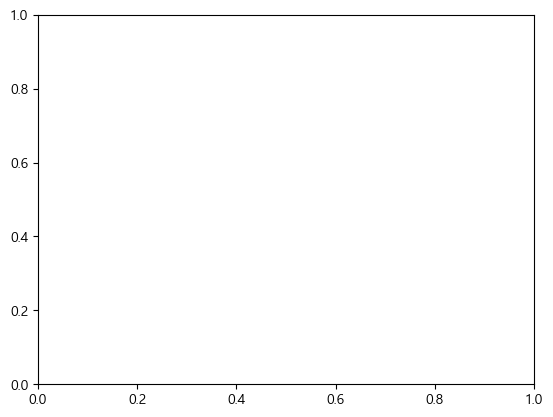

In [90]:
plot_text_simple(draw_korea)

In [91]:
def simpleDraw(draw_korea):
    plt.figure(figsize=(8,11))

    plot_text_simple(draw_korea)

    for path in BORDER_LINES: # 경계선 그리기
        ys, xs = zip(*path) #matplotlib에서 plus 시키기위해 x좌표끼리 모아주고 y좌표끼리 모아주는 것임
                            #우리는 첫번째가 y였고 두번째가 x여서 ys 먼저 놓았음.
        plt.plot(xs, ys, c='black', lw=1.5) 

    plt.gca().invert_yaxis() 
    # plt.gca().invert_yaxis(): y축을 뒤집어 주는것 반대로 x축을 뒤집어주는건 plt.gca().invert_xaxis()
    # 엑셀은 y가 큰것부터 위로 올라갈수록 작아짐. 그래프는 작은것에서 위로 올라가면 커짐. 
    # 그래서 이걸 추가함
    plt.axis('off') #그래프의 모든 축과 라벨(이름) 제거. x축과 y축 이름.
    plt.tight_layout() #파이썬 이미지 사이즈 잘림 방지
    plt.show()  

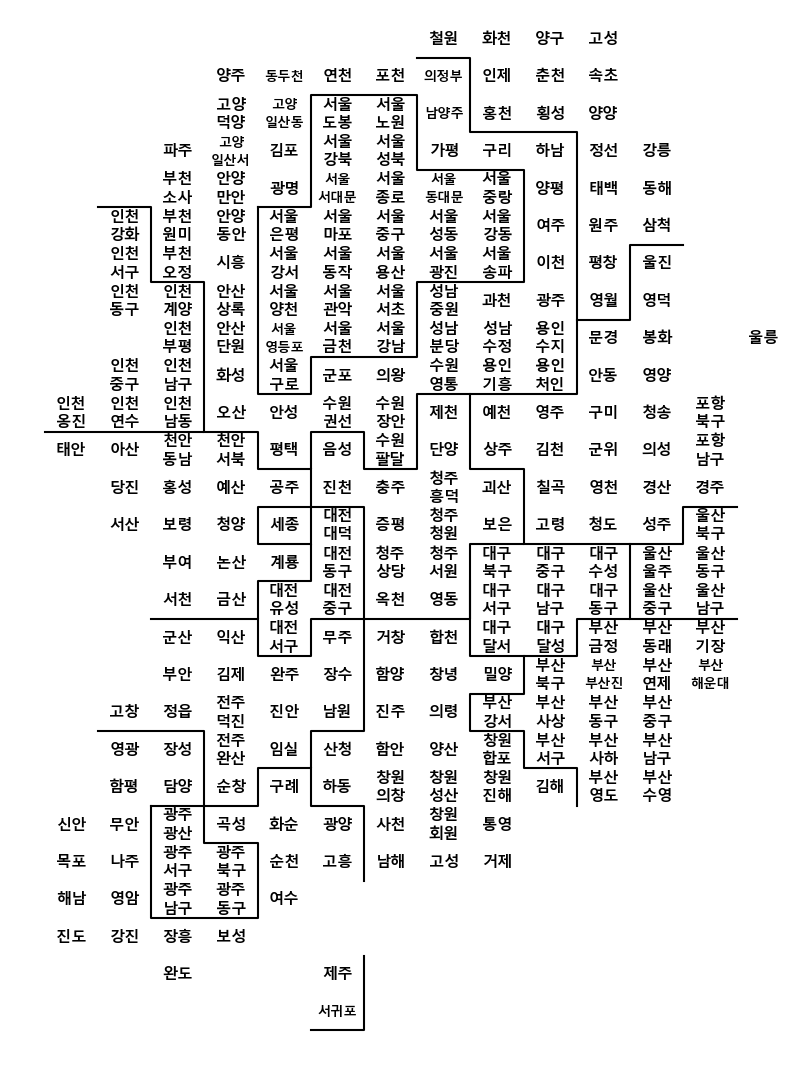

In [92]:
simpleDraw(draw_korea)

#### 검증작업 거치고 두 데이터 프레임 합치기

In [93]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())
# 차집합이 없음 이래야 정상

set()

In [94]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())
# 그런데 반대로 빼보면 차집합이 있음. 교환법칙이 성립하지 않기 때문
# 우리는 아래 지역들에서 행정구역을 나눈다음 그 데이터들을 가지고 있기 때문에 아래 지역들의 데이터는 필요하지 않음
# 그래서 빼주기로 함

{'고양', '부천', '성남', '수원', '안산', '안양', '용인', '전주', '창원', '천안', '청주', '포항'}

In [95]:
pop.head()

,광역시도,시군구,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,16566.0,34848.0,37679.0,106231.0,107615.0,213846.0,0.879323,True,강릉
1,강원도,고성군,1708.0,4421.0,7151.0,15899.0,14215.0,30114.0,0.477695,True,고성(강원)
2,강원도,동해시,7356.0,15587.0,15124.0,47166.0,46131.0,93297.0,0.972759,True,동해
3,강원도,삼척시,4470.0,10105.0,14610.0,35253.0,34346.0,69599.0,0.611910,True,삼척
4,강원도,속초시,6512.0,13668.0,12752.0,40288.0,41505.0,81793.0,1.021330,False,속초


In [96]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID'] == tmp].index) #pop['ID']가 tmp인 인덱스를 drop
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))    

set()


#### merge

In [97]:
pop = pd.merge(pop, draw_korea, how='left', on='ID') #ID컬럼을 기준으로 합쳐줌
pop.head()

,광역시도,시군구,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x
0,강원도,강릉시,16566.0,34848.0,37679.0,106231.0,107615.0,213846.0,0.879323,True,강릉,3,11
1,강원도,고성군,1708.0,4421.0,7151.0,15899.0,14215.0,30114.0,0.477695,True,고성(강원),0,10
2,강원도,동해시,7356.0,15587.0,15124.0,47166.0,46131.0,93297.0,0.972759,True,동해,4,11
3,강원도,삼척시,4470.0,10105.0,14610.0,35253.0,34346.0,69599.0,0.611910,True,삼척,5,11
4,강원도,속초시,6512.0,13668.0,12752.0,40288.0,41505.0,81793.0,1.021330,False,속초,1,10


#### 그림을 그리기 위한 데이터를 계산하는 함수

- blockedMap: 인구현황(pop)
- targetData: 그리고 싶은 컬럼

In [118]:
# 이 함수는 색상을 만들때 최소값을 흰색으로 한다.
# 값이 양수만 존재해서 하얀색부터 진한색으로 가는 것임
def get_data_info(targetData, blockedMap):  
    whitelablemin = (
        max(blockedMap[targetData]) - min(blockedMap[targetData])
    ) * 0.25 + min(blockedMap[targetData])
    # 예를 들어 수치가 높을수록 파란색 바탕이라면 하얀글자가 어울리겠고 
    # 하얀색 바탕이라면 하얀글자를 쓰면 안됨. 그래서 그 경계선을 지정하는 것임
    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    # 다시 최초로 엑셀로 x로 바꾼 값이 들어감
    # 아까 simple_data에서는 지도에 지역명이 들어갔는데 이제는 targetData로 지정된 columns의 숫자가 들어감

    return mapdata, vmax, vmin, whitelablemin

In [119]:
# 이 함수는 색상을 만들때 중간값을 흰색으로 한다.
# 0의 위치를 센터로 두고 싶을때 음수부터 양수까지의 값을 갖게함. 
# 화이트 색상이 센터 기준으로 몰리니까 특정범위로 잡아줘야됨
def get_data_info_for_zero_center(targetData, blockedMap):
    whitelabelmin = 5
    tmp_max = max(
        [np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))])
        #np.abs=절대값
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)

    return mapdata, vmax, vmin, whitelabelmin    

In [120]:
def plot_text(targetData, blockedMap, whitelablemin):
    for idx, row in blockedMap.iterrows():
        if len(row['ID'].split()) == 2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1]) 
            #dispname이라는 변수는 지도에 나타내는 이름을 뜻함
            # \n: 개행해라.
        elif row['ID'][:2] == '고성':
            dispname = '고성'
        else:
            dispname = row['ID']
        if len(dispname.splitlines()[-1]) >= 3: 
            #splitlines(): 줄 단위로 문자열 리스트 변환
            #줄 단위 마지막 글자가 3이 넘으면. 예) 부산 해운대 
            fontsize, linespacing = 9.5, 1.5 #linespacing: 띄어쓰기
            # 글자가 3글자이면 좀 작게 표현
        else:
            fontsize, linespacing = 11, 1.2
            # 글자가 3글자 미만이면 좀 크게 표현

        annocolor = 'white' if np.abs(row[targetData] > whitelablemin) else 'black'  
        # 이 코드쓰려고 whitelabelmin 함수를 만든 것임     

        plt.annotate(
            dispname,
            (row['x'] + 0.5, row['y'] + 0.5),
            weight='bold',
            color = annocolor,
            fontsize=fontsize, #위 if문에서 설정한 것
            linespacing=linespacing, #위 if문에서 설정한 것
            ha='center', # 수평정렬
            va='center' # 수직정렬
            )
        #plt.annotate: matplotlib에서 주석을 달기위한 기능. 지도 위에 지역이름을 나타내기 위해.

In [121]:
def drawkorea(targetData, blockedMap, cmapname, zeroCenter=False):
    if zeroCenter: #True면 얘가 실행됨. 
        mapdata, vmax, vmin, whitelablemin = get_data_info_for_zero_center(targetData, blockedMap)
        #선생님은 masked_mapdata라고 했는데 왜 그렇게 했는지는 모르겠다..
    if not zeroCenter: # 디폴트값이 zeroCenter=False이므로 이게 실행됨
        mapdata, vmax, vmin, whitelablemin = get_data_info(targetData, blockedMap) 
        #선생님은 masked_mapdata라고 했는데 왜 그렇게 했는지는 모르겠다..
    
    plt.figure(figsize=(8,11))
    plt.pcolor(mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5) #칸들이 나오는데 그걸 채우는 것. 밑에보면 칸들마다 회색보임
                #선생님은 masked_mapdata라고 했는데 왜 그렇게 했는지는 모르겠다..
    plot_text(targetData, blockedMap, whitelablemin)

    for path in BORDER_LINES: # 경계선 그리기
        ys, xs = zip(*path) #x좌표끼리 모아주고 y좌표끼리 모아주는 것임
        plt.plot(xs, ys, c='black', lw=1.5)

    plt.gca().invert_yaxis() 
    # plt.gca().invert_yaxis(): y축을 뒤집어 주는것 반대로 x축을 뒤집어주는건 plt.gca().invert_xaxis()
    # 엑셀은 y가 큰것부터 위로 올라갈수록 작아짐. 그래프는 작은것에서 위로 올라가면 커짐. 
    # 그래서 이걸 추가함
    plt.axis('off') #그래프의 모든 축과 라벨(이름) 제거. x축과 y축 이름.
    plt.tight_layout() #파이썬 이미지 사이즈 잘림 방지
    cb = plt.colorbar(shrink=0.1, aspect=10)
    cb.set_label(targetData)
    plt.show()  

In [122]:
pop.head()

,광역시도,시군구,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x,여성비,2030여성비
0,강원도,강릉시,16566.0,34848.0,37679.0,106231.0,107615.0,213846.0,0.879323,1,강릉,3,11,0.323597,-2.462121
1,강원도,고성군,1708.0,4421.0,7151.0,15899.0,14215.0,30114.0,0.477695,1,고성(강원),0,10,-2.796042,-11.366207
2,강원도,동해시,7356.0,15587.0,15124.0,47166.0,46131.0,93297.0,0.972759,1,동해,4,11,-0.554680,-2.806826
3,강원도,삼척시,4470.0,10105.0,14610.0,35253.0,34346.0,69599.0,0.611910,1,삼척,5,11,-0.651590,-5.764473
4,강원도,속초시,6512.0,13668.0,12752.0,40288.0,41505.0,81793.0,1.021330,0,속초,1,10,0.743951,-2.355868


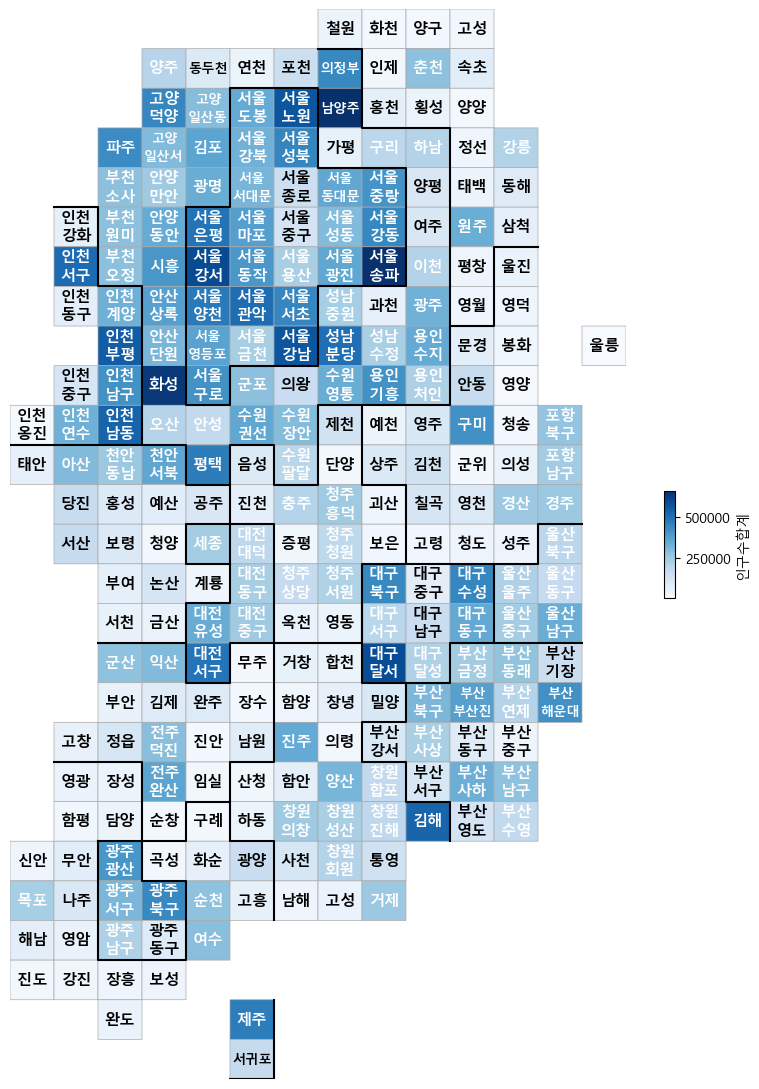

In [123]:
drawkorea("인구수합계", pop, 'Blues')

In [124]:
pop.head()

,광역시도,시군구,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID,y,x,여성비,2030여성비
0,강원도,강릉시,16566.0,34848.0,37679.0,106231.0,107615.0,213846.0,0.879323,1,강릉,3,11,0.323597,-2.462121
1,강원도,고성군,1708.0,4421.0,7151.0,15899.0,14215.0,30114.0,0.477695,1,고성(강원),0,10,-2.796042,-11.366207
2,강원도,동해시,7356.0,15587.0,15124.0,47166.0,46131.0,93297.0,0.972759,1,동해,4,11,-0.554680,-2.806826
3,강원도,삼척시,4470.0,10105.0,14610.0,35253.0,34346.0,69599.0,0.611910,1,삼척,5,11,-0.651590,-5.764473
4,강원도,속초시,6512.0,13668.0,12752.0,40288.0,41505.0,81793.0,1.021330,0,속초,1,10,0.743951,-2.355868


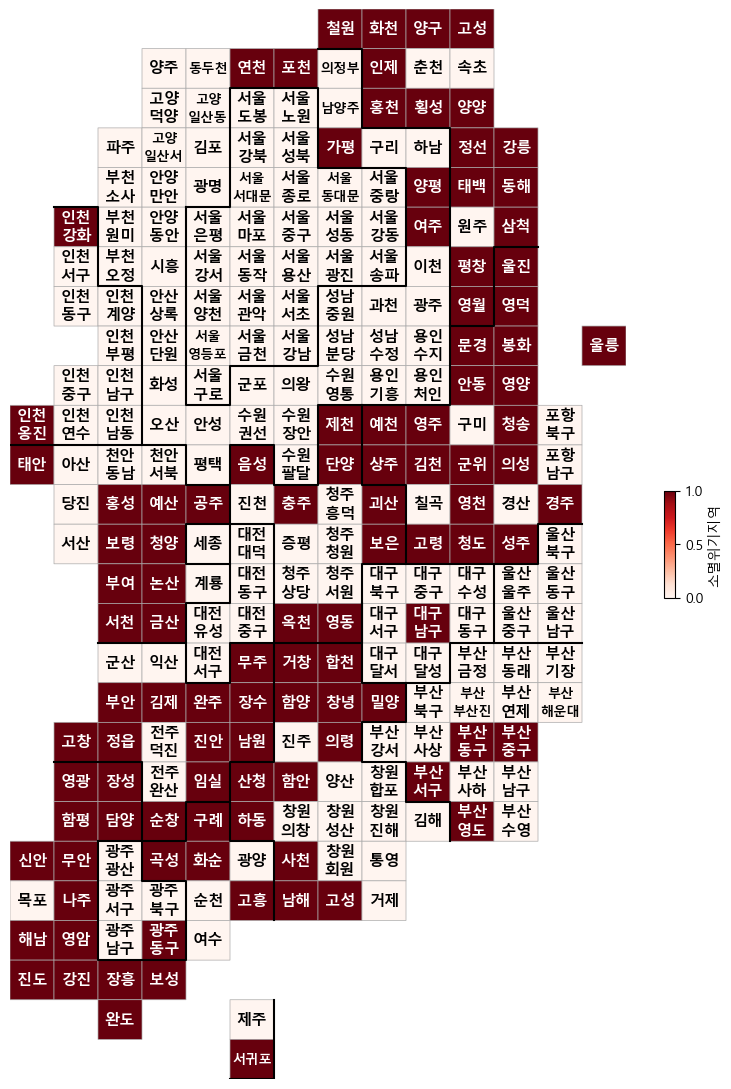

In [125]:
pop["소멸위기지역"] = [1 if con else 0 for con in pop["소멸위기지역"]] #con이 True면 1 False면 0
drawkorea('소멸위기지역', pop, 'Reds')

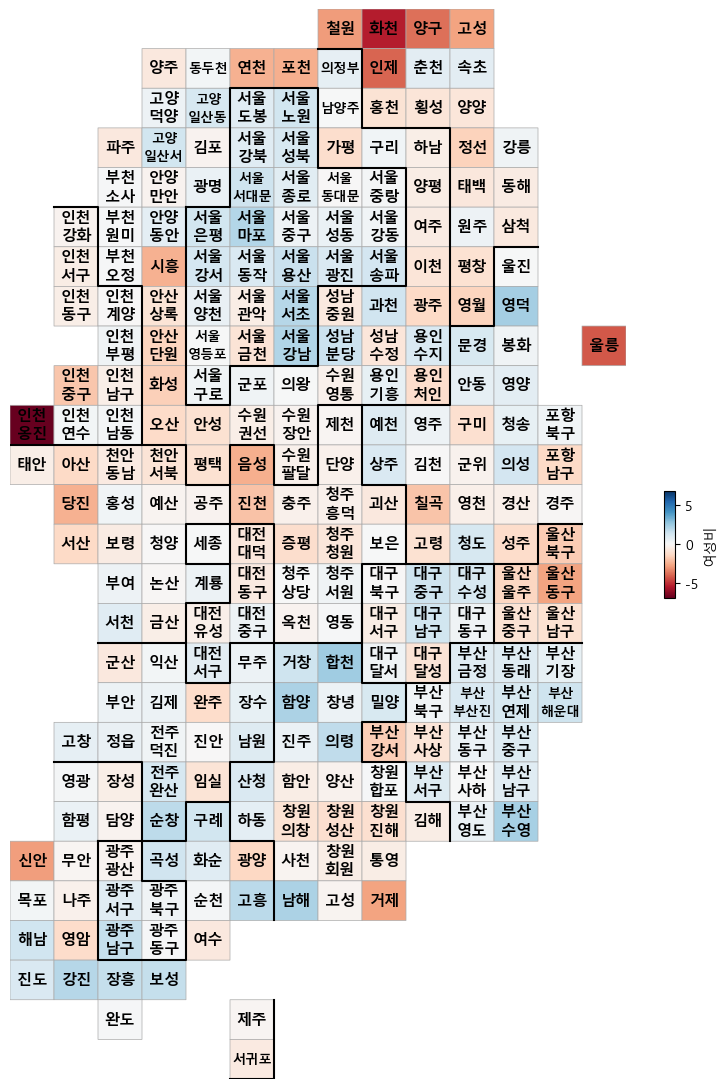

In [126]:
pop['여성비'] = (pop['인구수여자'] / pop['인구수합계'] - 0.5) * 100
# 남녀비율이 똑같다면 (pop['인구수여자'] / pop['인구수합계'])은 0.5가 되야함. 
# 그래서 0.5를 빼면 0에 정렬이 됨. 그다음 %로 바꿨음.
# 여성비가 0보다 크면 여성이 많은 것이고 0보다 작으면 남성이 많은 것임
drawkorea('여성비', pop, 'RdBu', zeroCenter=True)
# 결과를 놓고봤을때 전국적으로 남녀성비가 골고루인 것처럼 보인다. 그러나..

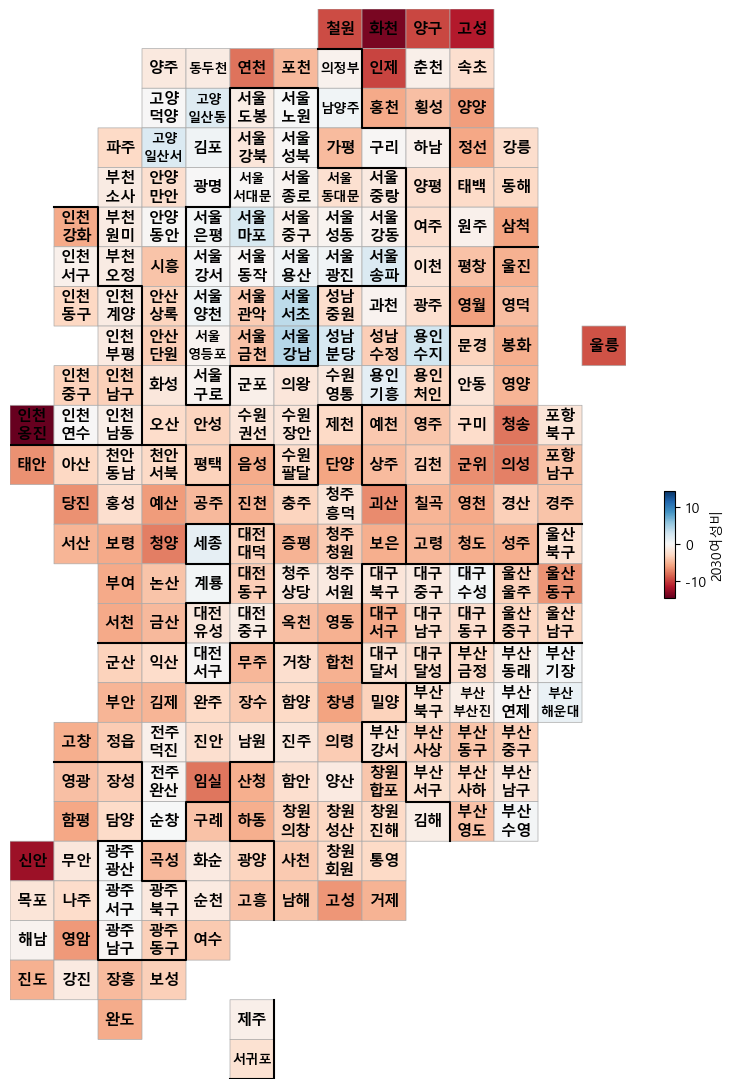

In [127]:
pop['2030여성비'] = (pop['20-39세여자'] / pop['20-39세합계'] - 0.5) * 100
drawkorea('2030여성비', pop, 'RdBu', zeroCenter=True)
# 20-39세로 놓고 보면 20-39세 남자가 훨씬 많다.

In [128]:
import folium
import json

pop_folium = pop.set_index('ID') #지도를 그릴때 ID를 인덱스로 잡아주기 위해서
pop_folium.head()

,광역시도,시군구,20-39세여자,20-39세합계,65세 이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,y,x,여성비,2030여성비
ID,,,,,,,,,,,,,,
강릉,강원도,강릉시,16566.0,34848.0,37679.0,106231.0,107615.0,213846.0,0.879323,1,3,11,0.323597,-2.462121
고성(강원),강원도,고성군,1708.0,4421.0,7151.0,15899.0,14215.0,30114.0,0.477695,1,0,10,-2.796042,-11.366207
동해,강원도,동해시,7356.0,15587.0,15124.0,47166.0,46131.0,93297.0,0.972759,1,4,11,-0.554680,-2.806826
삼척,강원도,삼척시,4470.0,10105.0,14610.0,35253.0,34346.0,69599.0,0.611910,1,5,11,-0.651590,-5.764473
속초,강원도,속초시,6512.0,13668.0,12752.0,40288.0,41505.0,81793.0,1.021330,0,1,10,0.743951,-2.355868


In [129]:
#인구수합계 지도시각화
geo_path = '../data/07_skorea_municipalities_geo_simple.json'
geo_str= json.load(open(geo_path, encoding='utf-8'))

my_map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
my_map.choropleth(
    geo_data = geo_str,
    data = pop_folium['인구수합계'],
    key_on='feature.id',
    columns=[pop_folium.index, pop_folium['인구수합계']],
    fill_color='YlGnBu'
)
my_map

In [130]:
# 소멸위기지역 지도 시각화

my_map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
my_map.choropleth(
    geo_data = geo_str,
    data = pop_folium['소멸위기지역'],
    key_on='feature.id',
    columns=[pop_folium.index, pop_folium['소멸위기지역']],
    fill_color='PuRd'
)
my_map

In [131]:
# 데이터 저장 

draw_korea.to_csv("../data/07_draw_korea.csv", encoding="utf-8", sep=",")